In [12]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [65]:
test = pd.read_csv('data/test.zip')

In [67]:
len(test)

27

In [2]:
df = pd.read_csv('data/train.zip')

In [5]:
df.head()

,day,consumption
0,2011-11-24,7.7580
1,2011-11-25,8.7385
2,2011-11-26,9.4770
3,2011-11-27,9.8030
4,2011-11-28,7.0690


In [7]:
df.rename(columns={'day':'ds', 'consumption':'y'}, inplace=True)

In [31]:
model_benchmark = Prophet()
model_benchmark.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/edy/lib/build/anaconda/envs/cspark/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [63]:
model = Prophet(growth='linear', n_changepoints=1, changepoint_prior_scale = 5)
model.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Benchmark

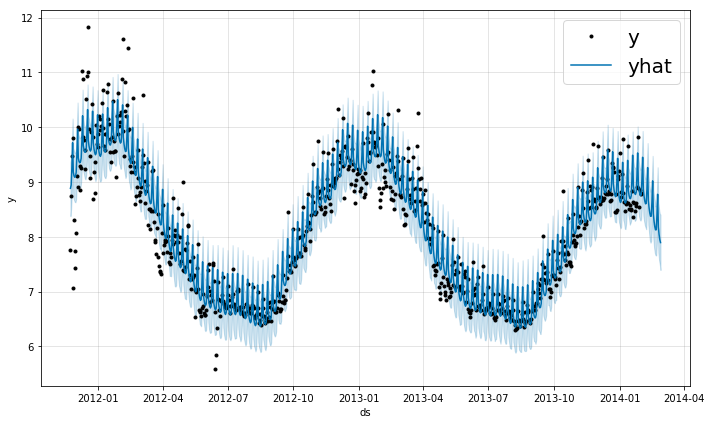

In [68]:
# we can now study the fit of the model - in order to do so, we need to creat another df
df_dates = model_benchmark.make_future_dataframe(periods=27, 
                                                include_history=True)
model_predictions = model_benchmark.predict( df_dates )
plot_pred = forecast_model.plot( model_predictions )
plt.legend(loc='best', fontsize=20)

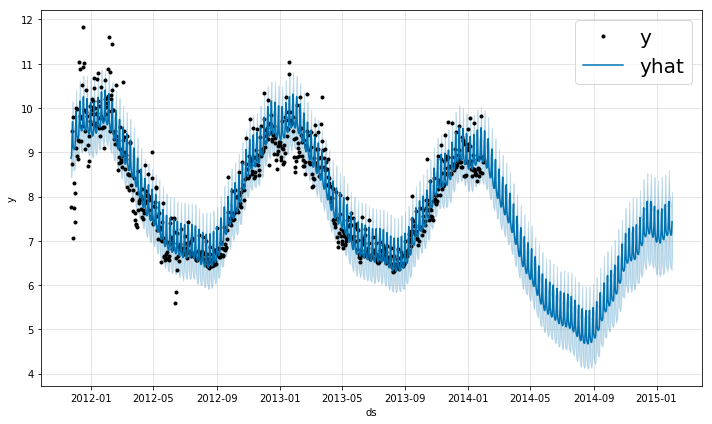

In [64]:
# we can now study the fit of the model - in order to do so, we need to creat another df
df_dates = model.make_future_dataframe(periods=365, 
                                                include_history=True)
model_predictions = model.predict( df_dates)
plot_pred = forecast_model.plot( model_predictions )
plt.legend(loc='best', fontsize=20)